In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [ ]:
# sizes of batch and # of epochs of data
batch_size = 64
epochs = 24

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train.shape[0]

60000

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [ ]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])   # verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## CNN code

In [ ]:
# Define the model
model = Sequential()

In [ ]:
num_classes

10

In [ ]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#   define compile to minimize categorical loss, use some optimizer to optimize, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=24,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/24
938/938 [==============================] - 17s 8ms/step - loss: 0.5268 - accuracy: 0.8094 - val_loss: 0.3834 - val_accuracy: 0.8634
Epoch 2/24
938/938 [==============================] - 7s 7ms/step - loss: 0.3391 - accuracy: 0.8771 - val_loss: 0.3472 - val_accuracy: 0.8728
Epoch 3/24
938/938 [==============================] - 7s 7ms/step - loss: 0.2946 - accuracy: 0.8916 - val_loss: 0.3144 - val_accuracy: 0.8855
Epoch 4/24
938/938 [==============================] - 7s 7ms/step - loss: 0.2638 - accuracy: 0.9021 - val_loss: 0.2978 - val_accuracy: 0.8929
Epoch 5/24
938/938 [==============================] - 7s 7ms/step - loss: 0.2391 - accuracy: 0.9104 - val_loss: 0.2957 - val_accuracy: 0.8953
Epoch 6/24
938/938 [==============================] - 7s 7ms/step - loss: 0.2190 - accuracy: 0.9189 - val_loss: 0.2676 - val_accuracy: 0.9039
Epoch 7/24
938/938 [==============================] - 7s 8ms/step - loss: 0.2005 - accuracy: 0.9257 - val_loss: 0.2563 - val_accuracy: 0.9070
Epoch

In [ ]:
hist.history

{'accuracy': [0.8099666833877563,
  0.8774333596229553,
  0.8911499977111816,
  0.9025333523750305,
  0.9105333089828491,
  0.9173333048820496,
  0.923466682434082,
  0.9291666746139526,
  0.9340833425521851,
  0.9385833144187927,
  0.9427833557128906,
  0.947700023651123,
  0.9515166878700256,
  0.9547833204269409,
  0.9585166573524475,
  0.9610666632652283,
  0.9656833410263062,
  0.9678833484649658,
  0.9697166681289673,
  0.9725000262260437,
  0.9748166799545288,
  0.9753333330154419,
  0.977649986743927,
  0.9799166917800903],
 'loss': [0.5306212902069092,
  0.3402053117752075,
  0.294933021068573,
  0.2641040086746216,
  0.24144677817821503,
  0.2221149504184723,
  0.20422296226024628,
  0.18952757120132446,
  0.17611360549926758,
  0.16257072985172272,
  0.1506003886461258,
  0.13828404247760773,
  0.12666645646095276,
  0.11772049963474274,
  0.10995069146156311,
  0.1011238768696785,
  0.0916118249297142,
  0.08516238629817963,
  0.08047232031822205,
  0.07401568442583084,
  0

Test loss: 0.40764009952545166
Test accuracy: 0.9065999984741211


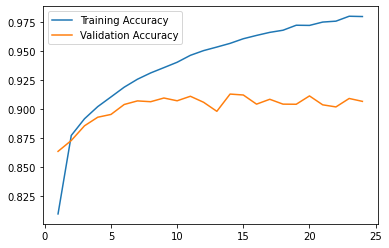

In [ ]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [ ]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

Parameters in a Conv layer:

((shape of width of filter *X* shape of height filter *X* number of filters in the previous layer+1) *X* number of filters)

Parameters in the FC layer🇰

((current layer c *X* previous layer p)+1 *X* c)

In **keras**, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

If you don't want to train: trainable=False

Understand the logic behind parameters:

https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

In [ ]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("cnn_mnist_model_weights.h5")

In [ ]:
model.save("/content/drive/MyDrive/FTDS-October/Materials/03DeepLearning/CNN")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/FTDS-October/Materials/03DeepLearning/CNN/assets
